In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

In [2]:
def partial_sum(input_list):
    """
    This function returns an array output where output[i] is the sum of all input numbers except input[i] 
    """
    output = []
    for ii in range(len(input_list)):
        output.append(sum(input_list[:ii] + input_list[ii+1:]))
    return output

In [3]:
assert partial_sum([1,2,3,4]) == [9,8,7,6]
assert partial_sum([2,9,5,5,1]) == [20,13,17,17,21]

# Question 2

In [4]:
postings = pd.read_csv("job_posts.csv")

In [5]:
postings.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


## 2.b

In [6]:
jobposts = postings["jobpost"]

The jobposts seem to have the same structure for each entry. New "headers" are printed in all capital letters, followed by a colon. Most entries place headers on a new line but some do not. The steps to identify and extract the headers are as follows:

1. Search for all fully capitalized headers at the beginning of lines. This serves to identify variants, e.g. 'TITLE' vs. 'JOB TITLE'.
2. Identify headers relevant to the information I want to extract and form groups of similar headers.
3. Search for those specific headers but without the constraint that they must be at the beginning of a line. This ensures that fewer job postings are skipped due to unexpected formatting.

In [7]:
print(jobposts[0])

AMERIA Investment Consulting Company
JOB TITLE:  Chief Financial Officer
POSITION LOCATION: Yerevan, Armenia
JOB DESCRIPTION:   AMERIA Investment Consulting Company is seeking a
Chief Financial Officer. This position manages the company's fiscal and
administrative functions, provides highly responsible and technically
complex staff assistance to the Executive Director. The work performed
requires a high level of technical proficiency in financial management
and investment management, as well as management, supervisory, and
administrative skills.
JOB RESPONSIBILITIES:  
- Supervises financial management and administrative staff, including
assigning responsibilities, reviewing employees' work processes and
products, counseling employees, giving performance evaluations, and
recommending disciplinary action;
- Serves as member of management team participating in both strategic
and operational planning for the company;
- Directs and oversees the company's financial management activities,
in

### Step 1

In [8]:
# Extract all capitalized headers in the job postings that start on a new line
all_headers = [re.findall(pattern="\n([A-Z /]+):", string=entry) for entry in jobposts]

In [9]:
# Look at all unique headers
all_headers_set = set([item for sublist in all_headers for item in sublist])
for header in sorted(all_headers_set):
    print(header)

ABOUT
ABOUT CHAMPIONSHIP
ABOUT COMPANY
ABOUT PROGRAM
ABOUT PROGRAM/ PROJECT
ABOUT PROJECT
ABOUT THE SPEAKER
ADDITIONAL CHARACTERISTICS
ADDITIONAL COMPETENCIES
ADDITIONAL DESIRED CHARACTERISTICS
ADDITIONAL NOTES
ADDITIONAL RESPONSIBILITIES
ADDITIONAL SELECTION CRITEREA
ADDITIONAL SELECTION CRITERIA
ADMINISTRATIVE DUTIES
AEFM
ANNOUNCEMENT CODE
ANNOUNCEMENT NUMBER
APPLICATION DEADLINE
APPLICATION PROCEDURES
ATTACHMENTS
AUTHOR
BACKGROUND
BASIC FUNCTION OF THE POSITION
COMMUNICATIONS
COMPETENCIES
CONTACT INFORMATION
CORPORATE COMPETENCIES
COURSE OVERVIEW
CRITERIA
DATE/ TIME
DEFINITION
DEFINITIONS
DESCRIPTION
DESIRABLE COMPETENCIES
DESIRABLE EXPERIENCE
DESIRABLE QUALIFICATIONS
DESIRED QUALIFICATION
DESIRED QUALIFICATIONS
DESIRED SKILLS
DESIRED SKILLS AND KNOWLEDGE
DETAIL DESCRIPTION
DISTINGUISHING FEATURES
DNS
DOMAIN KNOWLEDGE
DURATION
EDUCATION TYPE
EDUCATION/ EXPERIENCE
EDUCATIONAL LEVEL
EFM/MOH/NOR
ELIGIBILITY
ENROLLMENT
ESSENTIAL SPECIALIZED SKILLS/ KNOWLEDGE/ COMPETENCIES
EU CONTRACT NU

I can ensure that my approach is suitable by showing that most of the job postings are in the format I expect. The following barplot shows the number of headers per job posting. The vast majority of job postings adhere to this format, i.e. capitalized headers at the beginning of lines, followed by a colon.

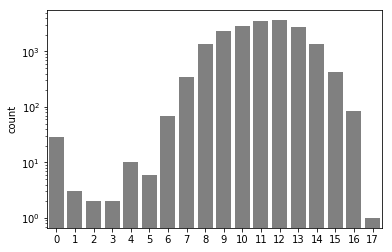

In [10]:
sns.countplot([len(x) for x in all_headers], color="grey")
plt.yscale("log")

In [11]:
print("{:.2f}% of job postings have at least 5 headers as defined above.".format(
    sum([len(x) > 5 for x in all_headers]) * 100 / len(all_headers)))

99.73% of job postings have at least 5 headers as defined above.


### Step 2
The next step requires some manual work to find symonyms for the information I'm interested in extracting from the jobposts column. The following dictionary summarizes synonyms I've identified based on the list above.

In [12]:
synonyms = {
    "job_title": ["JOB TITLE", "TITLE"],
    "position_duration": ["POSITION DURATION", "DURATION"],
    "position_location": ["POSITION LOCATION", "LOCATION"],
    "job_description": ["JOB DESCRIPTION", "NKRJOB DESCRIPTION", "DESCRIPTION"],
    "job_responsibilities": ["RESPONSIBILITIES", "JOB RESPONSIBILITIES"],
    "required_qualifications": [
        "REQUIRED QUALIFICATIONS",
        "DESIRED QUALIFICATION",
        "PREFERRED QUALIFICATIONS",
        "DESIRABLE QUALIFICATIONS",
        "DESIRED QUALIFICATIONS",
        "DESIRABLE COMPETENCIES",
        "KEY COMPETENCIES",
        "COMPETENCIES",
        "ESSENTIAL SPECIALIZED SKILLS/ KNOWLEDGE/ COMPETENCIES",
        "CORPORATE COMPETENCIES",
        "FUNCTIONAL COMPETENCIES",
        "ADDITIONAL COMPETENCIES"], 
    "remuneration": ["REMUNERATION/ SALARY", "REMUNERATION", "SALARY"],
    "application_deadline": ["APPLICATION DEADLINE"],
    "about company": ["ABOUT COMPANY", "ABOUT"]}

For the most part, these synonyms are mutually exclusive in job postings and therefor post no issue regarding overlaps. In the case of "Required Qualifications" and "About Company", however, several job postings do have overlaps. These are cases, for example, in which a job posting has both required as well as desirable qualifications. For the cases with overlaps, I will default to the "REQUIRED QUALIFICATIONS" and "ABOUT COMPANY" headers and ignore any other synonym headers.

I am doing this because there are instances where the "REQUIRED QUALIFICATIONS" header is missing but other qualification headers are present (and ditto for the "ABOUT COMPANY" header). Rather than accept missing values, I will fall back on the other synonyms.

In [13]:
for key in synonyms.keys():
    num_overlaps = len([
        headers for headers in all_headers if 
        len(set(synonyms[key]).intersection(set(headers))) > 1])
    if num_overlaps == 0:
        print("No overlaps for {}".format(key))
    else:
        print("{} overlaps for {}".format(num_overlaps, key))

No overlaps for job_title
No overlaps for position_duration
No overlaps for position_location
No overlaps for job_description
No overlaps for job_responsibilities
74 overlaps for required_qualifications
No overlaps for remuneration
No overlaps for application_deadline
535 overlaps for about company


### Step 3
Splitting each job posting is a matter of extracting text between the header of interest, or synonyms thereof, and the next header. This is a problem, however, as job postings may include "subcategories", e.g. they may group job requirements into different skill groups that I still want to all extract. To solve this problem, I identify all potential subsequent headers for each header of interest and, if necessary, manually remove those that indicate a subcategory.

In [60]:
def get_synonym_index(to_check, to_find):
    """
    A generic function that identifies if the list 'to_check' contains at least one of the 
    values in 'to_find'. It returns the index of the first value found
    
    :param to_check: An iterable
    :param synonyms: An iterable
    """
    
    for possible_header in to_find:
        if possible_header in to_check:
            return to_check.index(possible_header)        
    return None

In [67]:
subsequent_headers = {key: set() for key in synonyms.keys()}
for key in synonyms.keys():
    for headers in all_headers:
        synonym_index = get_synonym_index(headers, synonyms[key])
        if synonym_index is None:
            continue
        
        if synonym_index == len(headers)-1:
            subsequent_headers[key].add("--LAST HEADER--")
            continue
        
        subsequent_headers[key].add(headers[synonym_index+1])

In [68]:
subsequent_headers

{'job_title': {'ANNOUNCEMENT CODE',
  'AUTHOR',
  'DATE/ TIME',
  'DESCRIPTION',
  'DURATION',
  'EDUCATION TYPE',
  'EVENT TYPE',
  'FELLOWSHIP TYPE',
  'FUNCTIONAL TITLE',
  'INTENDED AUDIENCE',
  'JOB DESCRIPTION',
  'LOCATION',
  'NEWS TYPE',
  'OPEN TO',
  'OPEN TO/ ELIGIBILITY CRITERIA',
  'POSITION DURATION',
  'POSITION LOCATION',
  'PROJECT DURATION',
  'PURPOSE OF THE AWARD',
  'REFERENCE CODE',
  'REPORTS TO',
  'SCHOLARSHIP TYPE',
  'SPECIFY JOB CODE',
  'START DATE/ TIME',
  'TERM',
  'THE FOLLOWING BENEFITS',
  'WORK HOURS'},
 'position_duration': {'DESCRIPTION',
  'JOB DESCRIPTION',
  'LOCATION',
  'POSITION LOCATION'},
 'position_location': {'APPLICATION PROCEDURES',
  'DESCRIPTION',
  'DETAIL DESCRIPTION',
  'JOB DESCRIPTION',
  'JOB RESPONSIBILITIES',
  'NEWS DETAILS',
  'REQUIRED QUALIFICATIONS',
  'WORK HOURS'},
 'job_description': {'--LAST HEADER--',
  'APPLICATION DEADLINE',
  'APPLICATION PROCEDURES',
  'BASIC FUNCTION OF THE POSITION',
  'GRADE LEVEL',
  'JOB RE

In [74]:
after_job_title = []
for header in all_headers:
    if "TITLE" in header:
        after_job_title.append(header[header.index("TITLE")+1])

In [75]:
set(after_job_title)

{'ANNOUNCEMENT CODE',
 'AUTHOR',
 'DATE/ TIME',
 'DESCRIPTION',
 'DURATION',
 'EDUCATION TYPE',
 'EVENT TYPE',
 'FELLOWSHIP TYPE',
 'INTENDED AUDIENCE',
 'LOCATION',
 'NEWS TYPE',
 'OPEN TO',
 'OPEN TO/ ELIGIBILITY CRITERIA',
 'PURPOSE OF THE AWARD',
 'SCHOLARSHIP TYPE',
 'START DATE/ TIME',
 'TERM'}

In [ ]:
[h[0] for h in headers if len(h) > 0].count("NKRJOB DESCRIPTION")

In [76]:
[headers for headers in all_headers if "MEAL" in headers]

[['TITLE',
  'START DATE/ TIME',
  'DURATION',
  'LOCATION',
  'JOB DESCRIPTION',
  'JOB RESPONSIBILITIES',
  'MEAL',
  'REQUIRED QUALIFICATIONS',
  'REMUNERATION/ SALARY',
  'APPLICATION PROCEDURES',
  'OPENING DATE',
  'APPLICATION DEADLINE',
  'ABOUT COMPANY']]

In [ ]:
tmp = [
    postings[ii] for ii in range(len(postings)) if 
    len(re.findall("ABOUT", " ".join(headers[ii]))) > 1]
print(len(tmp))

In [82]:
tmp = [
    jobposts[ii] for ii in range(len(jobposts)) if 
    "IT" in all_headers[ii]]
print(len(tmp))

1


In [83]:
print(tmp[0])

World Vision Armenia
TITLE:  Organizational Support Department Manager
DURATION:  Long term with 3 month probation period.
LOCATION:  Yerevan, Armenia
JOB DESCRIPTION:  The Organizational Support Department Manager will
provide leadership and management to Legal, Administration, Procurement
and IT departments ensuring that staff, systems and processes are
running efficiently and at high levels of excellence. S/he will assist
ministry objectives achieving in a cost effective manner ensuring
compliance to WVI policies and procedures and local legislation. In
close collaboration with the WVA National Director (ND), the incumbent
will oversee all program support functions, and ensure overall
management quality.
JOB RESPONSIBILITIES:  
Program Support:
- Provide advice and support to the ND on all aspects of the effective
management and functioning of Legal, Administration, IT and Procurement
departments;
- Ensure that WVI and WVA standards and audit requirements are being
upheld by all sup